## Topic: Credit Card Fraudulent Transaction detection
### (Imbalanced Data Handling) 

### Introduction:

Nowadays, the problems related to financial fraud increase day by day around the world. In UK only, it is 190 billion pounds of lost money per annum. A variety of solutions to such kind of issue were implemented by vast number of banks recent years, however the fraudulence still affects a significant part of clients creating a strong erosion of confidence in banks and undermining their credibility. Money fraudulence continues to gain momentum which includes issues of plastic cards theft, breaking online-banking profiles, stealing personal information, account numbers and security codes. Thus, the actions to minimize money theft issues were undertaken but there is still an urgent need of more considerate work on finding better and stronger system to keep financial information private and difficult to hack. The implementation of AI into banking security system had already been started. Therefore, following Teradata’s success in determination of fraud schemes by their learning machines, it is important to review different AI tools for better and more accurate outcome in this regard.


### Content:

#### I. Exploratory Data Analysis (EDA):
**1. Correlation Analysis**

**2. Gaussian , Skewness and Kurtosis Analysis**

**3. Normalisation and Transformation**

#### II Imbalance Data Handling:
**1. UnderSampling - Random Undersampling**

**2. UnderSampling - N-groups Undersampling**

**3. UnderSampling - K-Means Undersampling**

**4. OverSampling - SMOTE (Synthetic Minority Oversampling Technique)**

**5. OverSampling - ADASYN (Adaptive Synthetic Sampling Approach)**

#### III. Modeling:
**Logistic Regression**

---

In [1]:
#import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

The data set can be download at: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
# import the dataset
df = pd.read_csv("creditcard.csv" , index_col=False)

In [3]:
print(" Number of data count: ", df['V1'].count())

 Number of data count:  284807


In [4]:
df.shape

(284807, 31)

**Before we work on the dataset, we need to separate the training set and test set of data in order to avoid the leakage of the test data which may affect the accuracy of the models being trained.**

In [5]:
# drawing 25% of the whole dataset for testing
df_test = df.sample(frac=0.25)
df_train = df.drop(df_test.index)

In [6]:
print('Training size: ', df_train.shape[0], '  Test size: ',df_test.shape[0])

Training size:  213605   Test size:  71202


In [7]:
#look at the first 5 rows of the training set
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0


In [8]:
#look at the last 5 rows of the training set
df_train.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
# the column names
print("Column Names: ")
df_train.columns

Column Names: 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### The index is the time starting from 0 to 172792. 
#### "V1" to "V28" features
#### "Amount" is the spending amount for the transaction
#### "Class" is the label: 0 for Non-fraudulent and 1 for fraudulent transactions

---

## I. Exploratory Data Analysis (EDA)

### 1. Correlation Analysis

**We first look at the statistics and correlation of the features**

In [10]:
# Statistics of all the feathures
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000
mean,94822.098509,0.002102,0.000944,0.002514,-0.000976,0.001366,0.000215,0.000326,-0.001449,-0.000644,...,0.001115,-0.000610,0.000855,-0.001097,0.000918,-0.000738,0.000126,0.000022,88.135695,0.001746
std,47476.655737,1.947307,1.646301,1.505419,1.415629,1.379576,1.334202,1.239883,1.201770,1.099665,...,0.746547,0.727456,0.635087,0.606549,0.521793,0.481770,0.405612,0.329038,252.497087,0.041751
min,1.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54200.000000,-0.918278,-0.598403,-0.887008,-0.849038,-0.688973,-0.767083,-0.553805,-0.207882,-0.643260,...,-0.228438,-0.543638,-0.161461,-0.356751,-0.316256,-0.327494,-0.070759,-0.052976,5.600000,0.000000
50%,84774.000000,0.018948,0.064925,0.178817,-0.019838,-0.053215,-0.274751,0.039856,0.022634,-0.052607,...,-0.029611,0.006675,-0.011314,0.040685,0.017246,-0.052903,0.001554,0.011232,22.000000,0.000000
75%,139311.000000,1.315771,0.803597,1.027288,0.743097,0.611692,0.398200,0.568578,0.327221,0.597199,...,0.186428,0.528404,0.147474,0.439515,0.350871,0.239761,0.091684,0.078349,77.290000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**All the standard deviation of V1 to V28 are very small. Although the range of the some features are large, some of the outliers data point may provide good indications for classifying the targets**

#### For easy reading, we use a heat map to the visualize the correlation.

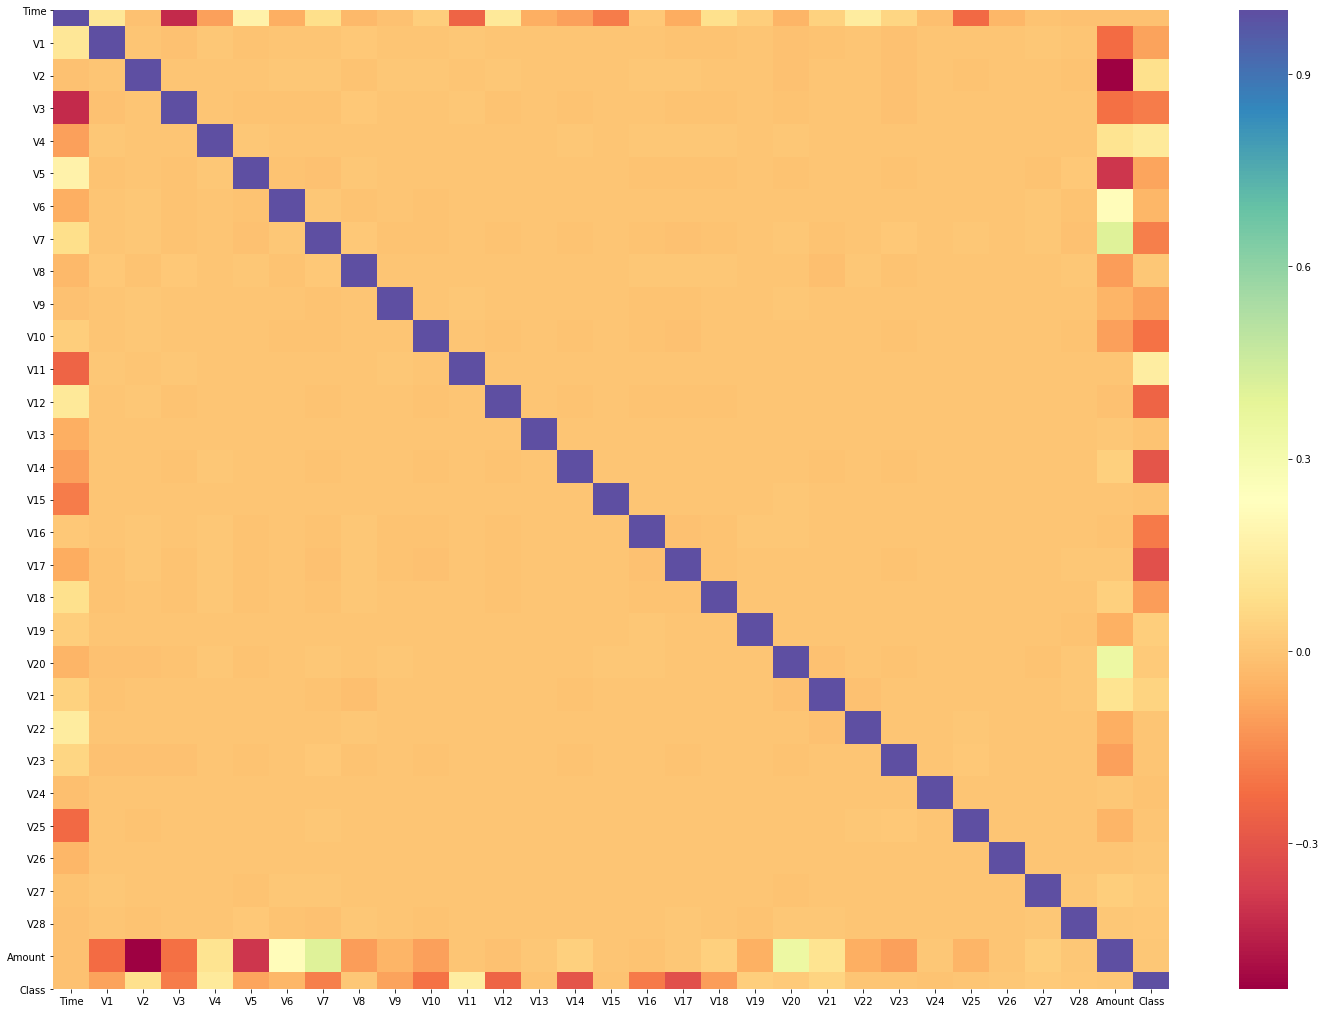

In [14]:
# Heatmap using Seaborn
plt.figure(figsize=(25,18))
sns.heatmap(df_corr, annot=None, cmap='Spectral')
plt.show()

**In this heatmap, we can see that most of the features are uncorrelated. This may due to the fact that the data were being processed with PCA.**

**For those features that correlating to "Amount" may be "income" or "worth" relating features. We can work on those features in the data modeling.**

**Next we look into the target group and the features relationships.**

**Now we separate the fraud and normal data, see if the correlation changed.**

In [17]:
#separate the fraud and normal data
df_train_fraud = df_train[df_train.Class == 1]
df_train_normal = df_train[df_train.Class == 0]

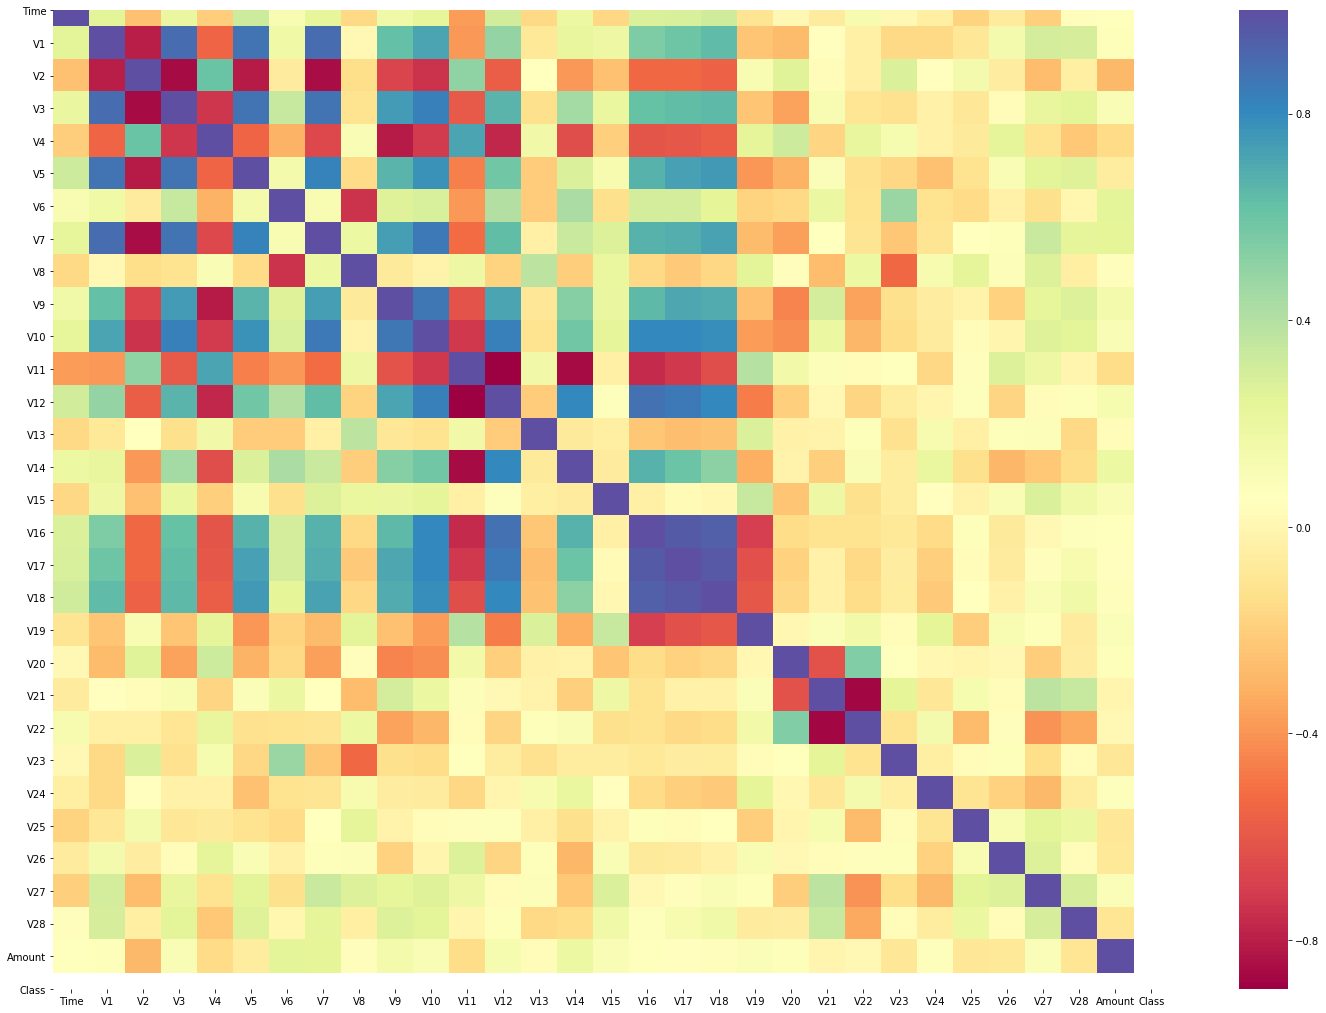

In [18]:
# Heatmap using Seaborn - Fraud Data only
plt.figure(figsize=(25,18))
sns.heatmap(df_train_fraud.corr(), cmap='Spectral')
plt.show()

**There is an interesting pattern between V1 to V19. V12,V16,V17 and V18 are having high correlation. Other pair like V1 to V3, V5, V7 have high correlation but V2 to V3, V5, V7 have hign negative correlation.**

---

### 2. Gaussian / Skewness / Kurtosis Test
**First we need to check that if all the features are in Gaussian (Normal) distribution.**

In [ ]:
# Normality test for the features:
from scipy.stats import normaltest
alpha = 0.05
for i in df_train.columns:
    stat, p = normaltest(df_train[i])
    print( i, 'Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

**By the above test, the features are not in normal distribution. Next, we are going to look at the Skewness and Kurtosis of the features.**

In [ ]:
# Skewness and Kurtosis of the features(Full Data)
from scipy.stats import kurtosis
from scipy.stats import skew

ske_kur = pd.DataFrame(index = df.columns, columns = ["Skewness", "Kurtosis"])
for k in df.columns:
    ske_kur["Skewness"][k] = skew(df[k])
    ske_kur["Kurtosis"][k] = kurtosis(df[k])
    print(k, ': Skewness: ' , skew(df[k]), '  Kurtosis: ', kurtosis(df[k]))

In [ ]:
# Skewness and Kurtosis of the features (Fraud Data)
from scipy.stats import kurtosis
from scipy.stats import skew

ske_kur_fraud = pd.DataFrame(index = df_train_fraud.columns, columns = ["Skewness", "Kurtosis"])
for k in df_train_fraud.columns:
    ske_kur_fraud["Skewness"][k] = skew(df_train_fraud[k])
    ske_kur_fraud["Kurtosis"][k] = kurtosis(df_train_fraud[k])
    print(k, ': Skewness: ' , skew(df_train_fraud[k]), '  Kurtosis: ', kurtosis(df_train_fraud[k]))

In [ ]:
# Skewness and Kurtosis of the features (Noraml Data)
from scipy.stats import kurtosis
from scipy.stats import skew

ske_kur_normal = pd.DataFrame(index = df_train_normal.columns, columns = ["Skewness", "Kurtosis"])
for k in df_train_normal.columns:
    ske_kur_normal["Skewness"][k] = skew(df_train_normal[k])
    ske_kur_normal["Kurtosis"][k] = kurtosis(df_train_normal[k])
    print(k, ': Skewness: ' , skew(df_train_normal[k]), '  Kurtosis: ', kurtosis(df_train_normal[k]))

**Skewness is the measure of asymmetry of the distribution. Positive skewness means long tail in positive side and negative with long tail in the negative side. Kurtosis is the measure of 'fat' tail. In this case we are interested in the extreme distributions. We sort out features with extreme Skewness and Kurtosis.**

In [ ]:
#calculate the difference betweeen noraml set and fraud set
ske_kur_difference = ske_kur_normal - ske_kur_fraud

In [ ]:
print("Skewness difference less then -1 :")
print(ske_kur_difference[ske_kur_difference["Skewness"]  < -1 ] )
print("Skewness difference more then 1 :")
print(ske_kur_difference[ske_kur_difference["Skewness"]  > 1 ] )
print("Kurtosis difference more then 20 :")
print(ske_kur_difference[ske_kur_difference["Kurtosis"]  > 20 ] )

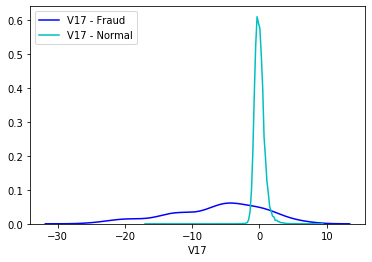

In [29]:
#V17 Distribution
sns.distplot(df_train_fraud.V17, hist=False, color='b', label='V17 - Fraud')
sns.distplot(df_train_normal.V17, hist=False, color='c' , label='V17 - Normal')

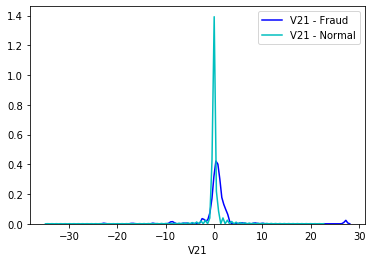

In [30]:
#V21 Distribution
sns.distplot(df_train_fraud.V21, hist=False, color='b', label='V21 - Fraud')
sns.distplot(df_train_normal.V21, hist=False, color='c' , label='V21 - Normal')

---

### 3. Normalisation and Transformation


**Normalisation was being done by Principal Component Analysis(PCA). In our dataset, we are told that V1 to V28 were being applied PCA already. It is unnecessary to normalise V1 to V28 again. We need only to normalize the Amount and time in order to run the Neural Network more efficiently. For some of the models in our research will not need to normalize the data to have similar effectiveness like tree models including the random forest and XGBoost model.**

**First of all, before transforming the data, we need to take a look at the distribution of Amount and Time.**

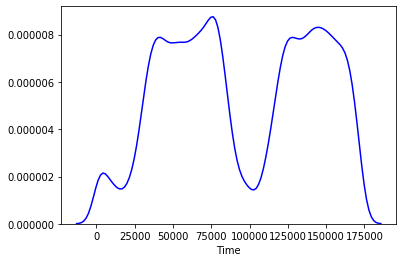

In [40]:
#Time Distribution
sns.distplot(df_train.Time, hist=False, color='b')

**As mentioned above, we see the peroidic pattern in the time. Our assumption for the time in seconds also make sense. So now we are going to transform the time to 0 to 86400s. Here we need to transform the 2nd day time to this range by deducting 86400.**

In [41]:
df_train['Time_to_one_day'] = df_train['Time']
for i in range(df_train.shape[0]):
    if df_train['Time'].iloc[i] > 86400:
        df_train['Time_to_one_day'].iloc[i] = df_train['Time'].iloc[i] - 86400
    else:
        df_train['Time_to_one_day'].iloc[i] = df_train['Time'].iloc[i]

/Users/matthewyeung/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
#transform the test set of data correspondingly
df_test['Time_to_one_day'] = df_test['Time']
for i in range(df_test.shape[0]):
    if df_test['Time'].iloc[i] > 86400:
        df_test['Time_to_one_day'].iloc[i] = df_test['Time'].iloc[i] - 86400
    else:
        df_test['Time_to_one_day'].iloc[i] = df_test['Time'].iloc[i]

**We can seen that both Time and Amount are positively skew. That means they have a long tail in the positive side. Most of the Amount datapoint concentrate in 0 to 5000. There are some outliers at 17500to 20000. One method to transform the data in order to minimize the effect of the skewness is to use cube root for transformation.**

In [44]:
f = lambda x: np.power(x, 1./3)
df_train['Time_tran'] = f(df_train['Time_to_one_day'])
df_train['Amount_tran'] = f(df_train['Amount'])
df_test['Time_tran'] = f(df_test['Time_to_one_day'])
df_test['Amount_tran'] = f(df_test['Amount'])

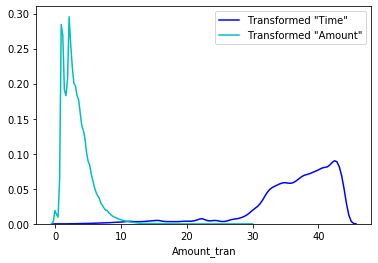

In [45]:
#Time and Amount Distribution after transformation
sns.distplot(df_train.Time_tran, hist=False, color='b',label='Transformed "Time"')
sns.distplot(df_train.Amount_tran, hist=False, color='c', label='Transformed "Amount"')

**The Time and Amount data sqreeze and the range of the values decrease which can increase the efficiency of applying Neural Network by decreasing the computation power.**

**Next, we need to transform our dataset.**

In [ ]:
#Before transforming the dataset, we need to make the change on Normalizaion data:
df_train = df_train[['Time_tran', 'V1', 'V2', 'V3', 'V4', 'V5', 
                    'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 
                    'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
                    'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 
                    'V27', 'V28', 'Amount_tran', 'Class']]
df_test = df_test[['Time_tran', 'V1', 'V2', 'V3', 'V4', 'V5', 
                    'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 
                    'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
                    'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 
                    'V27', 'V28', 'Amount_tran', 'Class']]

---

### II. Imbalance Data Handling

**The current dataset is severely imblanced and before training our models, the imbalance in the dataset will have to addressed first as this will reduce the ability of our models to make predictions regarding the minority class**

In [ ]:
print('Not Fraud', round(
        df_train['Class'].value_counts()[0]/len(df_train)*100, 2), '% of the dataset')
print('Fraud', round(
        df_train['Class'].value_counts()[1]/len(df_train)*100, 2), '% of the dataset')

In [ ]:
sns.countplot("Class",data=df_train)

### 1. UnderSampling - Random undersampling

**Random undersampling involves selecting random data points from the majority class to match the number of data points in the minority class. In our work we tried some different normal to fraud ratios. We found that 97.5 to 2.5 gives most of the model best result to classify the target group.**

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle
def random_undersampling(df, ran_ratio):
    X = df.loc[:, :'Amount_tran'] # Features
    y = df.loc[:, 'Class':] # Targets
    #seperate classses
    fraud = df[df['Class']==1]
    not_fraud = df[df['Class']==0]
    notfraud_US = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = int(len(fraud)*(100/ran_ratio-1)),
                                random_state = 27) # reproducible results

    undersampled_data = pd.concat([notfraud_US, fraud])
    undersampled_data = shuffle(undersampled_data)
    return undersampled_data
    

In [ ]:
undersampled_data = random_undersampling(df_train,2.5) # match minority n for a 97.5:2.5 ratio
undersampled_data.head()

In [ ]:
sns.countplot(undersampled_data.loc[:,'Class'])

**Using the function random_undersampling() we are able to balance the dataset classes to a 50/50 split**

### 2. UnderSampling - N-groups stacking

**The majority class is split into n groups such that each group has the same number of samples as the minority class. This allows us to overcome the imbalance by training our model n times. However, from the random undersampling, we found that the ratio between normal to fraud is 97.5 to 2.5. So our N-group stacking will also use the same ratio.** 

In [ ]:
from sklearn.utils import shuffle

fraud = df_train[df_train['Class']==1]
not_fraud = df_train[df_train['Class']==0]
fraud_size = fraud.shape[0]
not_fraud_size = not_fraud.shape[0]
ratio = 2.5                          # each group match minority n for a 97.5:2.5 ratio
group_num = int((not_fraud_size/fraud_size)/(100/ratio -1))
data_size = int(fraud_size*(100/ratio -1))

#separate the non-fraud group
for k in range(group_num):
    exec(f'not_fraud_{k} = not_fraud.iloc[k*data_size:k*data_size + data_size,:]')

#creating dataset for all groups
for k in range(group_num):
    exec(f'n_group_stacking_{k} = shuffle(pd.concat([fraud,not_fraud_{k}]))')


In [ ]:
#we take a random look at a group 4. It will be the same as in random UnderSampling.
n_group_stacking_4.head()

In [ ]:
sns.countplot(n_group_stacking_4.loc[:,'Class'])

### 3. UnderSampling - K-Means Undersampling

**Similar to the n-groups stacking however now after you have your n groups you use K-means to find the centre point of the group**

In [ ]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
def kmeans_US(df, fraud_ratio):
    fraud = shuffle(df[df['Class']==1])
    not_fraud = shuffle(df[df['Class']==0])
    fraud_size = fraud.shape[0]
    cluster_num = int(fraud_size*(100/fraud_ratio -1))     
    nf_kmeans = KMeans(n_clusters=cluster_num, random_state=0, max_iter = 10).fit(not_fraud)
    nf_centres = nf_kmeans.cluster_centers_
    df_kmeans = shuffle(np.concatenate([fraud,nf_centres],axis=0))
    df_kmeans = pd.DataFrame(df_kmeans, columns = df.columns)
    
    return df_kmeans

**Be careful! The running time is relatively long even with 20 iteration (around 1 hour)**

In [ ]:
k_mean_train = kmeans_US(df_train,20)  # 80:20 ratio split

In [ ]:
k_mean_train.shape

In [ ]:
sns.countplot(k_mean_train.loc[:,'Class'])

### 4. OverSampling - SMOTE ( Synthetic Minority Oversampling Technique )

**SMOTE generates new synthetic data using the k-Nearest Neighbour algorithm for the minority class**

In [ ]:
from imblearn.over_sampling import SMOTE

def smote(df, smote_ratio):
    x = df.loc[:, :'Amount_tran'] # Features
    y = df.loc[:, 'Class':] # Targets
    sm = SMOTE(ratio = (smote_ratio/100), random_state=42)
    x_train, y_train = sm.fit_sample(x, np.ravel(y))
    return x_train, y_train

In [ ]:
xt, yt = smote(df_train,20)  # 80:20 ratio split

In [ ]:
xt.shape, yt.shape

In [ ]:
sns.countplot(yt)

### 5. OverSampling - ADASYN ( Adaptive Synthetic Sampling Approach )

**ADASYN generates new synthetic data using a weighted distribution for different minority class examples according to their level of difficulty in learning**

In [ ]:
from imblearn.over_sampling import ADASYN

def adasyn(df, ada_ratio):
    x = df.loc[:, :'Amount_tran'] # Features
    y = df.loc[:, 'Class':] # Targets
    ada = ADASYN(ratio = (ada_ratio/100), random_state=42)
    x_train, y_train = ada.fit_sample(x, np.ravel(y))
    return x_train, y_train

In [ ]:
xada, yada = adasyn(df_train, 20)  # 80:20 ratio split

In [ ]:
xada.shape, yada.shape

In [ ]:
sns.countplot(yada)

**Before modeling, we need to define all the training set corresponding to the above undersampling and oversampling techniques. Remarks: the test set will not be changed throughout the experiments**

In [ ]:
#use Standard score to standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#define the training set and test set for non undersampling and oversampling
X_train = df_train.loc[:, :'Amount_tran']
X_train = scaler.fit_transform(X_train)
y_train = np.ravel(df_train.loc[:, 'Class':])
X_test = df_test.loc[:, :'Amount_tran']
X_test = scaler.fit_transform(X_test)
y_test = np.ravel(df_test.loc[:, 'Class':])

In [ ]:
#define the training set for UnderSampling - Random UnderSampling
X_train_ran = undersampled_data.loc[:, :'Amount_tran']
X_train_ran = scaler.fit_transform(X_train_ran)
y_train_ran = np.ravel(undersampled_data.loc[:, 'Class':])

In [ ]:
#define the training set for UnderSampling - N-group Stacking
for k in range(group_num):
    exec(f'dataset_train_{k} = n_group_stacking_{k}.values')
    exec(f'X_train_ngroup_{k} = dataset_train_{k}[:,:-1]')
    exec(f'y_train_ngroup_{k} = dataset_train_{k}[:,-1:]')

#Standardize the feathures
for k in range(group_num):
    X_train_stand = locals()["X_train_ngroup_" + str(k)]
    exec(f'X_train_ngroup_{k} = scaler.fit_transform(X_train_stand)')

In [ ]:
#define the training set for UnderSampling - KMean Stacking
X_train_kmean = k_mean_train.loc[:, :'Amount_tran']
X_train_kmean = scaler.fit_transform(X_train_kmean)
y_train_kmean = np.ravel(k_mean_train.loc[:, 'Class':])

In [ ]:
#define the training set for OverSampling - SMOTE
X_train_smote = xt
X_train_smote = scaler.fit_transform(X_train_smote)
y_train_smote = yt.reshape(-1,1)

In [ ]:
#define the training set for OverSampling - ADASYN
X_train_ada = xada
X_train_ada = scaler.fit_transform(X_train_ada)
y_train_ada = yada.reshape(-1,1)

---

### III Modelling

####  Logistic Regression

**Logistic Regression is the most commonly use binary classifier. Logistic Sigmoid function is used in the model. In the credit card fraudulent transaction classification, we encountered this binary classification problem. We tried to use the this algorithm as it was easy to apply and low computation power needed.**

**First, we try to use the data without undersampling or oversampling.**

In [ ]:
# define the matrix of the scores
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score 
from sklearn.linear_model import LogisticRegression
def scores(y_true, y_predict):
    recall = recall_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    fbeta = fbeta_score(y_true, y_predict, 0.8)
    accuracy = accuracy_score(y_true,y_predict)
    print('Accuracy: ', accuracy*100,'%')
    print('Precision: ', precision*100,'%')
    print('Recall: ', recall*100,'%')
    print('F-beta Score:',fbeta*100,'%')
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_predict))

In [ ]:
#training the model with LogisticRegression function
from sklearn.linear_model import LogisticRegression
clf_full = LogisticRegression(penalty='l2',random_state=7, class_weight = None, solver='sag',multi_class='ovr').fit(X_train, y_train)

In [ ]:
#Training error
train_values_clf = clf_full.predict(X_train)
print('Training Set score for Logistic regression (Full Dataset)')
scores(y_train, train_values_clf)

In [ ]:
#Test error
test_values_clf = clf_full.predict(X_test)
print('Test Set score for Logistic regression (Full Dataset)')
scores(y_test, test_values_clf)

#### i. UnderSampling - Random UnderSampling

In [ ]:
#Train the Logistic model
from sklearn.linear_model import LogisticRegression
clf_ran = LogisticRegression(penalty='l2',random_state=7, class_weight = None, solver='sag',multi_class='ovr').fit(X_train_ran, y_train_ran)

In [ ]:
#Training error
train_values_ran_clf = clf_ran.predict(X_train_ran)
print('Training Set score for Logistic regression (Random UnderSampling)')
scores(y_train_ran, train_values_ran_clf)

In [ ]:
#Test error
test_values_ran_clf = clf_ran.predict(X_test)
print('Test Set score for Logistic regression (Random UnderSampling)')
scores(y_test, test_values_ran_clf)

#### ii. UnderSampling - N-groups Undersampling

In [ ]:
#Train the Logistic model
from sklearn.linear_model import LogisticRegression
for k in range(group_num):
    X_train_c = locals()["X_train_ngroup_" + str(k)]
    y_train_c = locals()["y_train_ngroup_" + str(k)]
    clf = LogisticRegression(penalty='l2',random_state=42, class_weight = 'dict' ,solver='sag',multi_class='ovr').fit(X_train_c, np.ravel(y_train_c))
    predict_values_clf = clf.predict(X_test)
    locals()["predict_values_ngroup_clf_" + str(k)] = predict_values_clf

In [ ]:
test_values_ngroup_clf = np.zeros((predict_values_ngroup_clf_0.shape[0],))

for k in range(group_num):
    test_values_ngroup_clf += locals()["predict_values_ngroup_clf_" + str(k)]

test_values_ngroup_clf = np.round(test_values_ngroup_clf/group_num)

In [ ]:
print('Test Set score for Logistic regression (N-group UnderSampling)')
scores(y_test, test_values_ngroup_clf)

**We can see that the score is not so good. This may due to over fitting. Now we try not to involve all the n groups in the voting for the test set.**

In [ ]:
#Train the Logistic model
from sklearn.linear_model import LogisticRegression
train_ratio = 0.5
for k in range(int(group_num*train_ratio)):
    X_train = locals()["X_train_ngroup_" + str(k)]
    y_train = locals()["y_train_ngroup_" + str(k)]
    clf = LogisticRegression(penalty='l2',random_state=42, class_weight = 'dict' ,solver='sag',multi_class='ovr').fit(X_train, np.ravel(y_train))
    predict_values_clf = clf.predict(X_test)
    locals()["predict_values_ngroup_clf_" + str(k)] = predict_values_clf

In [ ]:
test_values_ngroup_clf = np.zeros((predict_values_ngroup_clf_0.shape[0],))

for k in range(int(group_num*train_ratio)):
    test_values_ngroup_clf += locals()["predict_values_ngroup_clf_" + str(k)]

test_values_ngroup_clf = np.round(test_values_ngroup_clf/int(group_num*train_ratio))

In [ ]:
print('Test Set score for Logistic regression (N-group UnderSampling) with train ratio')
scores(y_test, test_values_ngroup_clf)

#### iii. UnderSampling - K-means Undersampling

In [ ]:
#Train the Logistic model
from sklearn.linear_model import LogisticRegression
clf_kmean = LogisticRegression(penalty='l2',random_state=7, class_weight = None, solver='sag',multi_class='ovr').fit(X_train_kmean, y_train_kmean)

In [ ]:
#Training error
train_values_kmean_clf = clf_kmean.predict(X_train_kmean)
print('Training Set score for Logistic regression (KMean UnderSampling)')
scores(y_train_kmean, train_values_kmean_clf)

In [ ]:
#Test error
test_values_kmean_clf = clf_kmean.predict(X_test)
print('Test Set score for Logistic regression (KMean UnderSampling)')
scores(y_test, test_values_kmean_clf)

#### iv. OverSampling - SMOTE

In [ ]:
#Train the Logistic model
clf_smote = LogisticRegression(penalty='l2',random_state=7, class_weight = None, solver='sag',multi_class='ovr').fit(X_train_smote, y_train_smote)

In [ ]:
#Training error
train_values_smote_clf = clf_smote.predict(X_train_smote)
print('Training Set score for Logistic regression (SMOTE)')
scores(y_train_smote, train_values_smote_clf)

In [ ]:
#Test error
test_values_smote_clf = clf_smote.predict(X_test)
print('Test Set score for Logistic regression (SMOTE)')
scores(y_test, test_values_smote_clf)

#### v. OverSampling - ADASYN 

In [ ]:
#Train the Logistic model
clf_ada = LogisticRegression(penalty='l2',random_state=7, class_weight = None, solver='sag',multi_class='ovr').fit(X_train_ada, y_train_ada)

In [ ]:
#Training error
train_values_ada_clf = clf_ada.predict(X_train_ada)
print('Training Set score for Logistic regression (ADASYN)')
scores(y_train_ada, train_values_ada_clf)

In [ ]:
#Test error
test_values_ada_clf = clf_ada.predict(X_test)
print('Test Set score for Logistic regression (ADASYN)')
scores(y_test, test_values_ada_clf)